In [28]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn import metrics


In [2]:
# specify the folder containing the PNG files
benign_path = "/Users/elliestrande/Desktop/benign"
malignant_path = "/Users/elliestrande/Desktop/malignant"

img_list = []
labels = []

# import benign images
for file in os.listdir(benign_path):
    img_path = os.path.join(benign_path, file)
    if img_path.endswith('.png'):
        img = Image.open(img_path).convert('RGB')
        img = img.resize((224,224))
        img_array = np.array(img)
        img_list.append(img_array)
        labels.append(0)
    
# import malignant images
for file in os.listdir(malignant_path):
    img_path = os.path.join(malignant_path, file)
    if img_path.endswith('.png'):
        img = Image.open(img_path).convert('RGB')
        img = img.resize((224,224))
        img_array = np.array(img)
        img_list.append(img_array)
        labels.append(1)

# convert the list to a numpy array
img_array = np.array(img_list)

# normalize the pixel values to be between 0 and 1
img_array = img_array / 255.0

# convert the labels to a numpy array 
labels = np.array(labels)

# print the shape of the array
print(img_array.shape)
print(labels.shape)

(245, 224, 224, 3)
(245,)


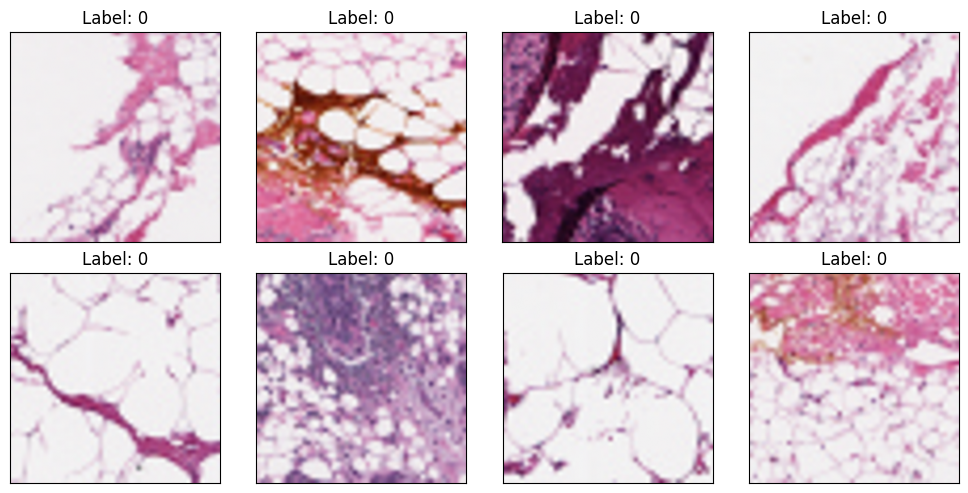

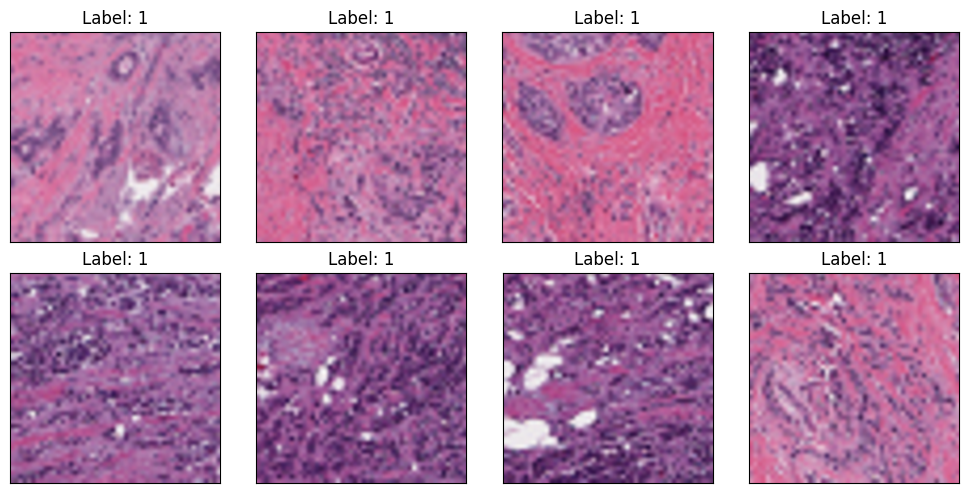

In [ ]:
# Create a function to plot a grid of images
def plot_images(images, labels, start_idx, end_idx, rows=2, cols=4):
    fig, axes = plt.subplots(rows, cols, figsize=(10,5))
    for i, ax in enumerate(axes.flat):
        img_idx = start_idx + i
        if img_idx < end_idx:
            ax.imshow(images[img_idx])
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title("Label: {}".format(labels[img_idx]))
    plt.tight_layout()
    plt.show()

# Plot the first 8 and last 8 images
plot_images(img_array, labels, 0, 8)
plot_images(img_array, labels, len(img_array) - 8, len(img_array))

In [4]:
len(labels)

245

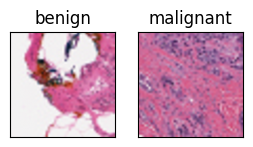

In [5]:
# display the images
class_names = ['benign', 'malignant']
fig = plt.figure(figsize=(8,3))
for i in range(len(class_names)):
  ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
  idx = np.where(labels[:]==i)[0]
  features_idx = img_array[idx,::]
  img_num = np.random.randint(features_idx.shape[0])
  im = features_idx[img_num,::]
  ax.set_title(class_names[i])
  #im = np.transpose(features_idx[img_num,::], (1, 2, 0))
  plt.imshow(im)
plt.show()

In [6]:
# WHAT WE DID:
# use the 'PIL' library to import the images and preprocess them by 
# converting them to RGB format and resizing them to 224x224 pixels. 
# we then split the data into training and testing sets using 
# 'train_test_split' from 'sklearn', with a test size of 0.3. 
# finally, we converted the lables to binary format using 
# to_categorical from 'tensorflow.keras.utils'

In [7]:
# When you load an image with a library like PIL or OpenCV, it is loaded
# as a numpy array, which is a matrix of numbers representing the pixel
# values of the image. 

In [8]:
# split into trianing and testing sets
X_train, X_test, y_train, y_test = train_test_split(img_array, labels, test_size=0.2, random_state=42)


In [9]:
# initializing the model
model = Sequential()

# defining a convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation = 'relu',
                input_shape=((224, 224, 3))))

# define a max pooling layer
model.add(MaxPooling2D((2, 2)))

# defining a second convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu'))

model.add(MaxPooling2D((2, 2)))

# defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation = 'relu'))

model.add(MaxPooling2D((2, 2)))

# flatten the output and add fully connected layers
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.5))

# output layer with sigmoid activation function for binary classification
model.add(Dense(1, activation = 'sigmoid'))


Metal device set to: Apple M2


In [10]:
# compiling the model
model.compile(loss = 'binary_crossentropy',
             optimizer = Adam(learning_rate = 0.0001, decay = 1e-6),
             metrics = ['accuracy'])


X_test = np.array(X_test)
y_test = np.array(y_test)

In [15]:
# training the model
history = model.fit(X_train, y_train,
         batch_size = 128, 
         shuffle = True,
         epochs = 50,
         validation_data = (X_test, y_test))


Epoch 1/50
2/2 [==============================] - 2s 845ms/step - loss: 0.0853 - accuracy: 0.9745 - val_loss: 0.1730 - val_accuracy: 0.9184
Epoch 2/50
2/2 [==============================] - 2s 898ms/step - loss: 0.0856 - accuracy: 0.9745 - val_loss: 0.1291 - val_accuracy: 0.9796
Epoch 3/50
2/2 [==============================] - 2s 666ms/step - loss: 0.0874 - accuracy: 0.9898 - val_loss: 0.1576 - val_accuracy: 0.9184
Epoch 4/50
2/2 [==============================] - 2s 783ms/step - loss: 0.0803 - accuracy: 0.9796 - val_loss: 0.1641 - val_accuracy: 0.9184
Epoch 5/50
2/2 [==============================] - 2s 768ms/step - loss: 0.0799 - accuracy: 0.9847 - val_loss: 0.1294 - val_accuracy: 0.9592
Epoch 6/50
2/2 [==============================] - 1s 583ms/step - loss: 0.0897 - accuracy: 0.9796 - val_loss: 0.1643 - val_accuracy: 0.9184
Epoch 7/50
2/2 [==============================] - 1s 659ms/step - loss: 0.0688 - accuracy: 0.9796 - val_loss: 0.1527 - val_accuracy: 0.9388
Epoch 8/50
2/2 [====

In [16]:
scores = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss: %.3f' % scores[0])
print('Test accuracy: %.3f' % scores[1])

Test loss: 0.131
Test accuracy: 0.959


In [24]:
# get predicted labels for test data
y_pred = model.predict(X_test)

#convert predicted probs to binary labels
y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred]

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_binary)

# Extract true positives, false positives, true negatives, and false negatives
tn, fp, fn, tp = conf_mat.ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


2/2 [==============================] - 0s 101ms/step
Sensitivity: 1.0
Specificity: 0.9310344827586207


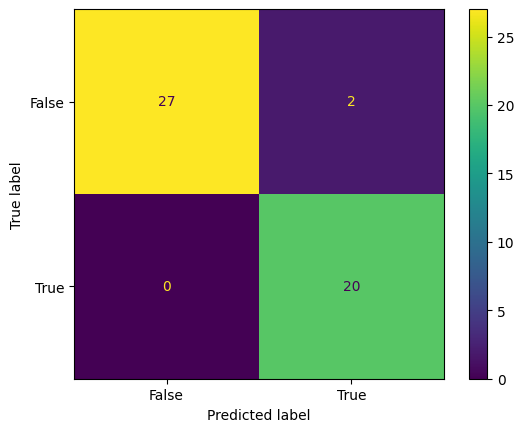

In [32]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = [False, True])
cm_display.plot()
plt.show()

In [56]:
history_dict = history.history

history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

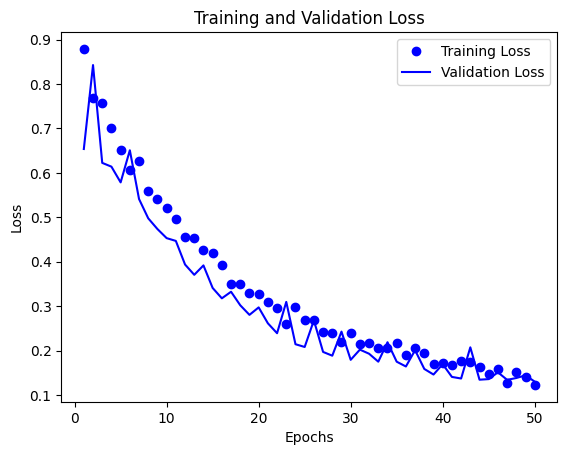

In [62]:
# graph training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

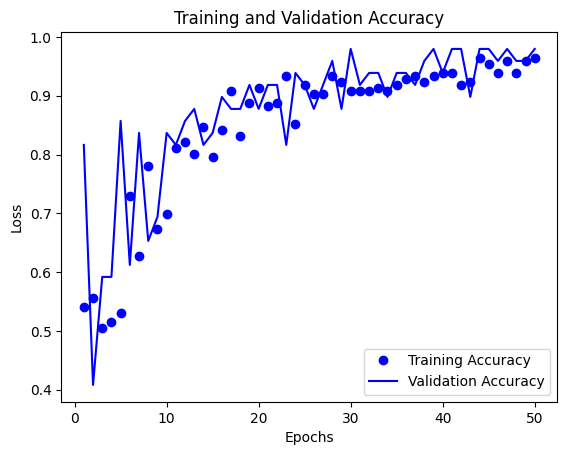

In [63]:
# plot training and validation accuracy 
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

In [19]:
model.predict(X_test)

2/2 [==============================] - 0s 91ms/step


array([[0.13244405],
       [0.00590647],
       [0.9835089 ],
       [0.99774766],
       [0.7050738 ],
       [0.8954682 ],
       [0.84677356],
       [0.01552459],
       [0.00956968],
       [0.0374842 ],
       [0.12345216],
       [0.9383824 ],
       [0.08960596],
       [0.91881156],
       [0.01924456],
       [0.9618721 ],
       [0.9803231 ],
       [0.43523943],
       [0.04517682],
       [0.9974566 ],
       [0.43756592],
       [0.18647827],
       [0.02950452],
       [0.20961587],
       [0.79492986],
       [0.01496576],
       [0.36424616],
       [0.09078912],
       [0.9965341 ],
       [0.73578227],
       [0.020213  ],
       [0.979961  ],
       [0.01213716],
       [0.0030383 ],
       [0.00431508],
       [0.05055556],
       [0.00517962],
       [0.5951142 ],
       [0.7685982 ],
       [0.9975145 ],
       [0.06005961],
       [0.00200001],
       [0.11163323],
       [0.00993533],
       [0.9571323 ],
       [0.00838391],
       [0.9426314 ],
       [0.006